# Preço com base na localização

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
data = pd.read_csv("data/kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


O que podemos inferir da função descrita acima?

A primeira informação que me chama a atenção é o termos uma cas com 33 quartos. Aparentemente é uma casa bem grande.

O tamanho máximo (square feet) é de 13.450, enquanto que o mínimo é 290. Sendo assim podemos ver que os dados são distribuídos.

### Visualisation

Agora, vamos ver o que podemos inferir utilizando simplesmente visualização dos dados.

---

De forma intuitiva, quero começar olhando a relação do preço com a quantidade de quartos. Dado, que vi uma casa com 33 quartos, quero descobrir qual o número de quartos mais comum.

<function seaborn.utils.despine>

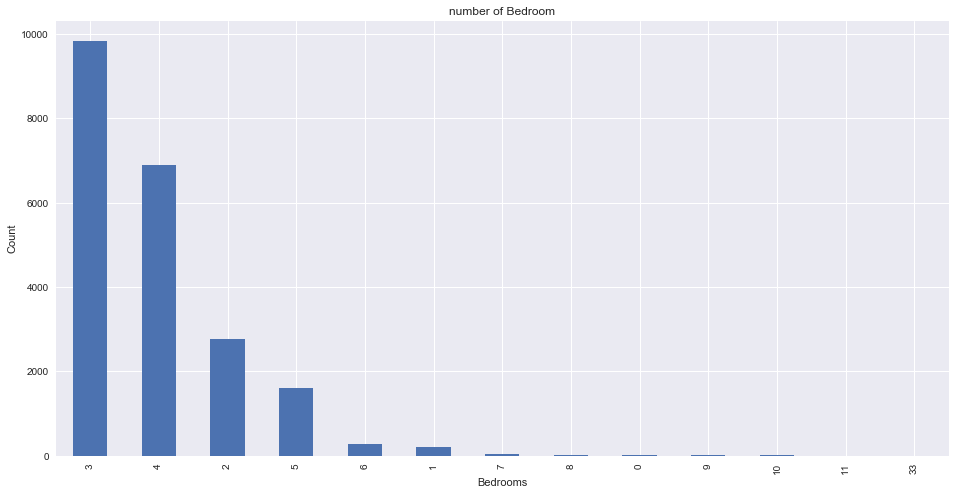

In [5]:
plt.figure(figsize=(16,8))
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

Como podemos visualizar no gráfico, as casas de 3 quartos são mais comumente vendidas, seguidas pelas casas de 4 quartos. 

Então, como isso é útil? Para um construtor com acesso a essas informações, seria possível determinar a quantidade de quartos em um novo empreendimento. Para um vendedor, é possível determinar quais propriedades dar prioridade na venda.

Então, agora sabemos que 3 e 4 quartos são mais vendidos. Mas em que localidades?

Então, de acordo com o conjunto de dados, temos latitude e longitude de cada casa. Vamos ver a localização comum e como as casas são colocadas.

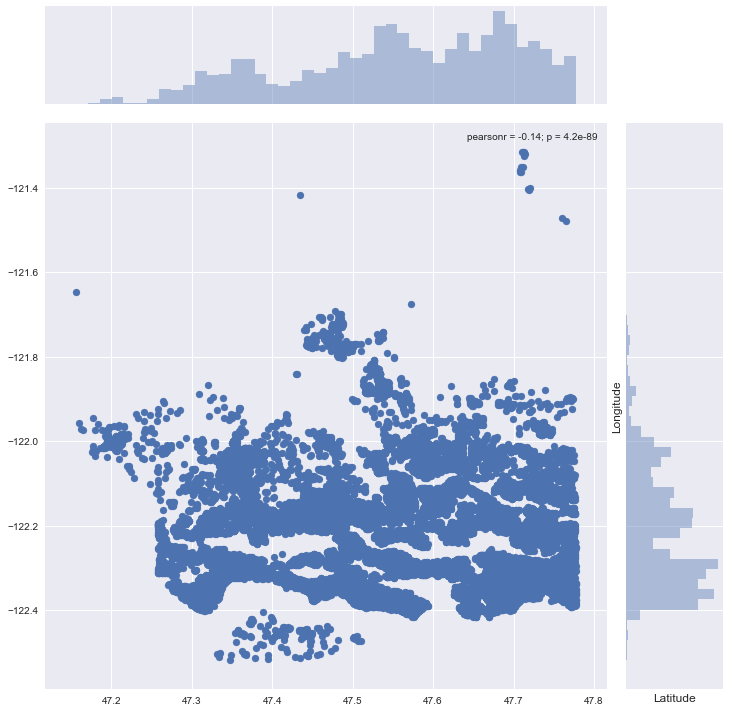

<function seaborn.utils.despine>

In [6]:
plt.figure(figsize=(16,8))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

Usamos marinhos e obtemos sua bela visualização. A função Joinplot nos ajuda a ver a concentração e colocação dos dados, e pode ser realmente útil nessa tarefa. Vamos ver o que podemos inferir dessa visualização. 

Para latitude entre **-47.7** e **-48.8** existem muitas casas, o que significa que talvez seja uma localização ideal. Mas quando comparamos com a longitude, podemos ver que a concentração é maior entre **-122,2** a **-122,4**, o que neste caso significaria que a maior parte das compras foi neste local específico.

### Como fatores comuns estão afetando o preço das casas?
Já determinamos os principais locais de transação, agora vamos ver alguns fatores comuns que afetam os preços das casas. Vamos começar pela seguinte hipótese: Se o preço é afetado pela área habitacional ou não?

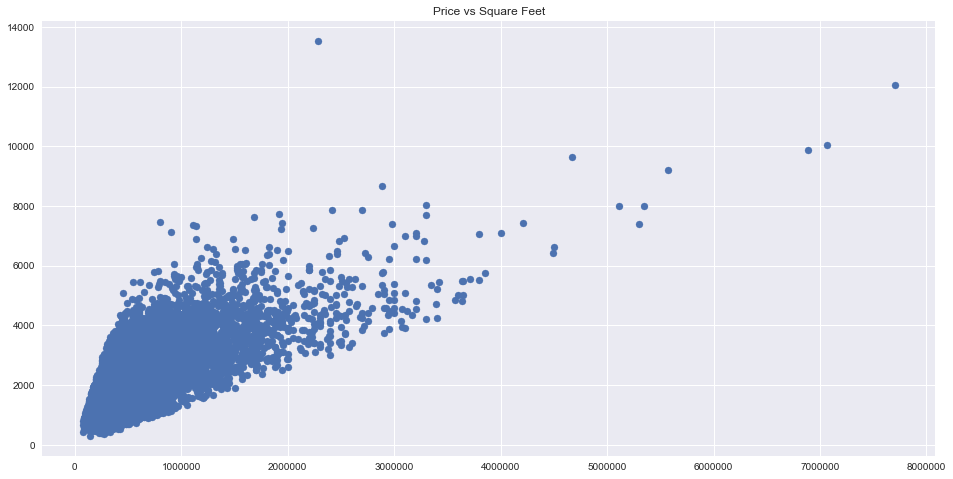

In [7]:
plt.figure(figsize=(16,8))
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

Utilizando um simples gráfico de dispersão podemos ver como os nossos pontos estão dispersos. No gráfico acima podemos ver que quanto maior a área da casa, maior o preço.

Os dados se concentrem em uma zona de preços específica, porém podemos ver uma relação linear na direção da dispersão. Também é possível notar uma algumas irregularidades, onde temos casas com uma alta metragem sendo vendidads por um baixo valor.

Isso pode significar que outro fator tenha afetado no valor de venda deste imóvel.

No gráfico abaixo podemos notar a distribuição dos valores levando em consideração as informações de localização baseadas na longitude, informação que já determinamos anteriormente.

Notem que a área entre -122,2 a -122,4 vende casas em quantidade superior...

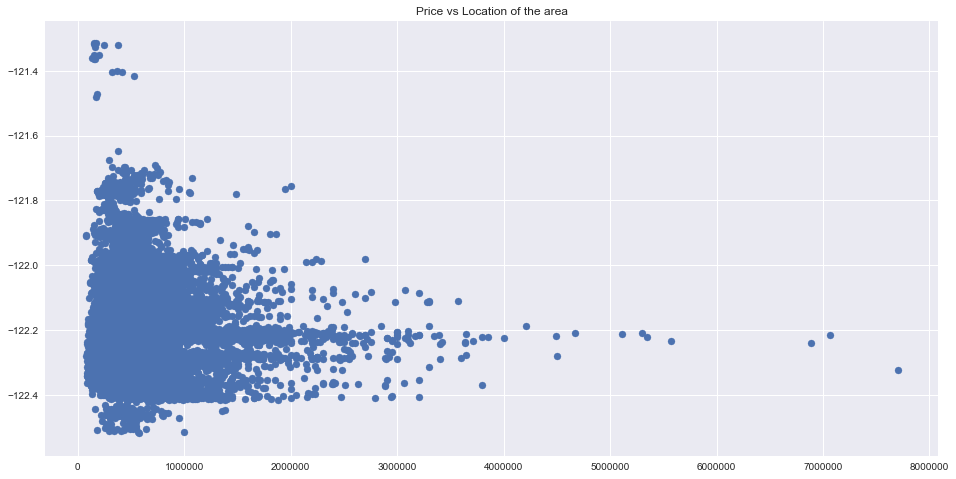

In [8]:
plt.figure(figsize=(16,8))
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

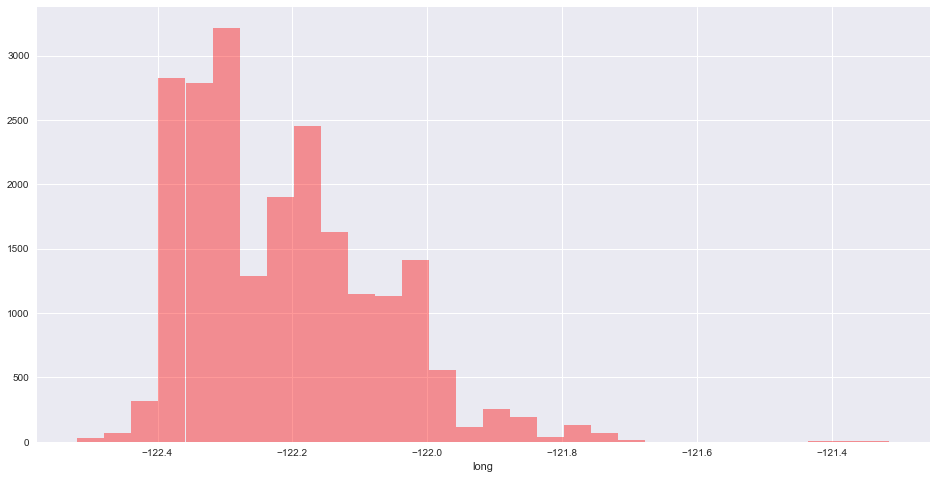

In [9]:
plt.figure(figsize=(16,8))
sns.distplot(data.long,bins=30,kde=False,color='red')

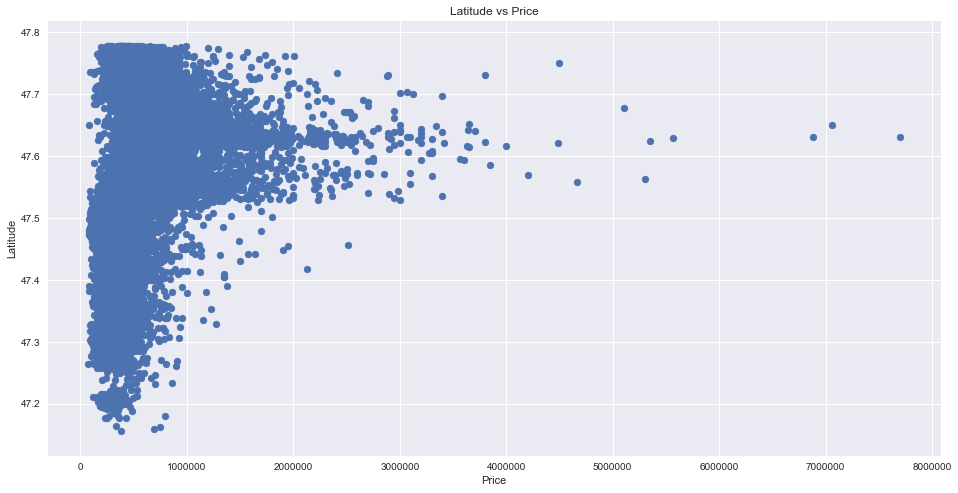

In [10]:
plt.figure(figsize=(16,8))
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

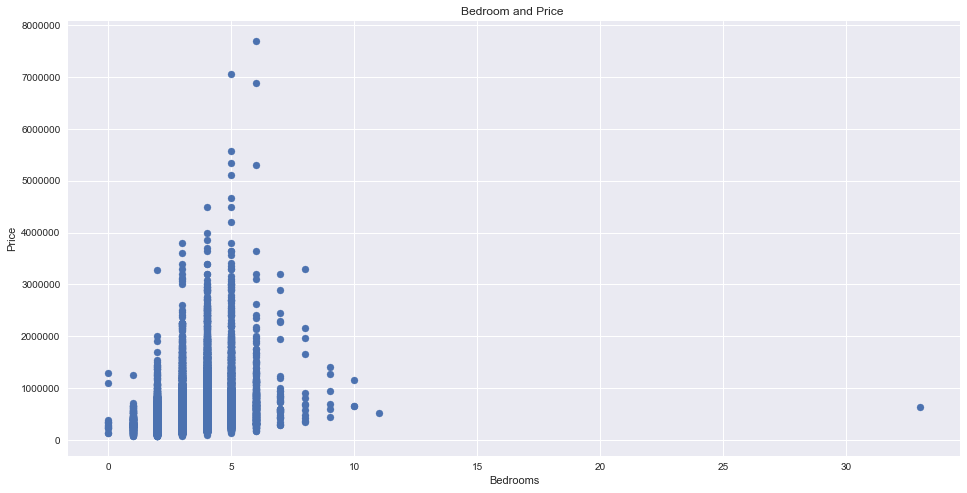

<function seaborn.utils.despine>

In [11]:
plt.figure(figsize=(16,8))
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

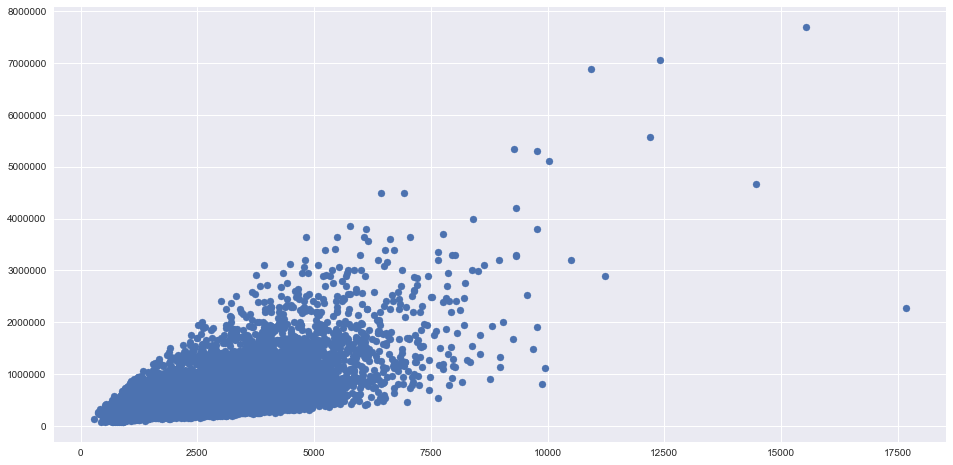

In [12]:
plt.figure(figsize=(16,8))
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])

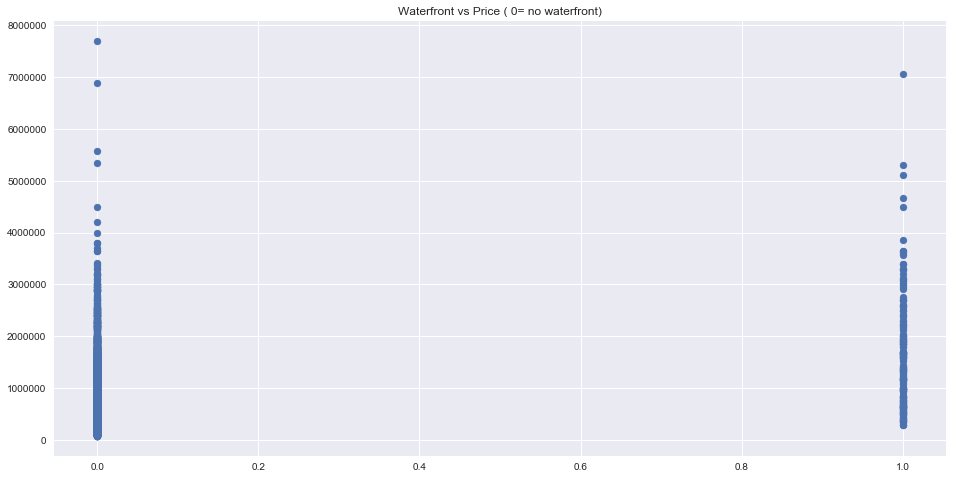

In [13]:
plt.figure(figsize=(16,8))
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

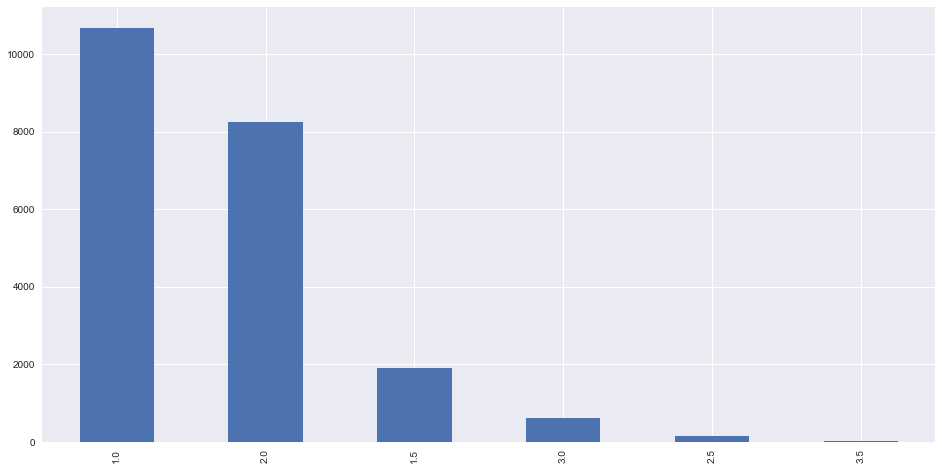

In [14]:
plt.figure(figsize=(16,8))
data.floors.value_counts().plot(kind='bar')

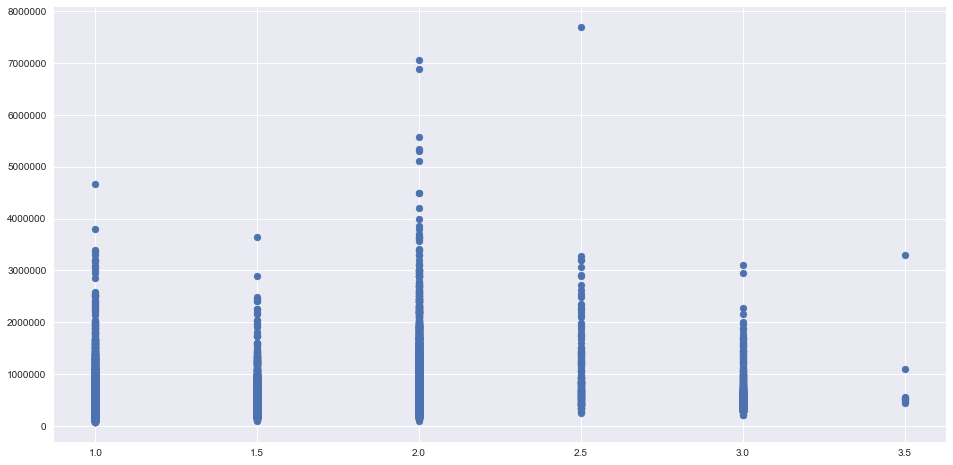

In [15]:
plt.figure(figsize=(16,8))
plt.scatter(data.floors,data.price)

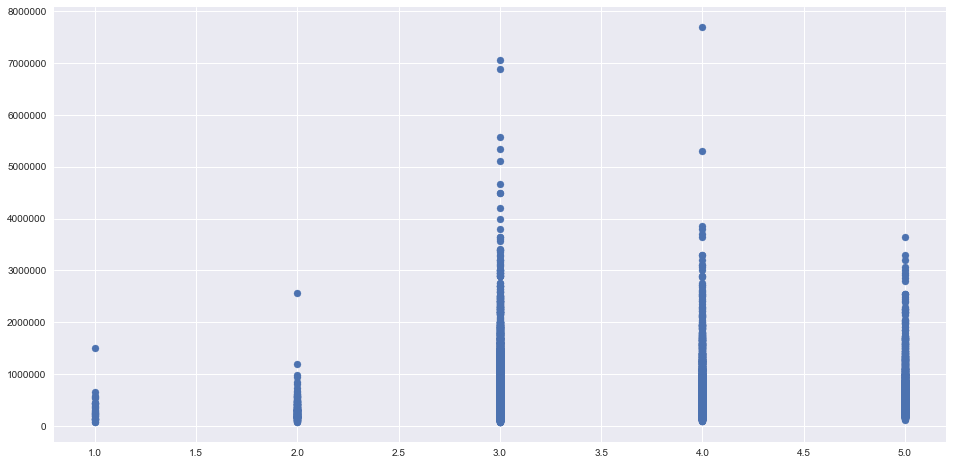

In [16]:
plt.figure(figsize=(16,8))
plt.scatter(data.condition,data.price)

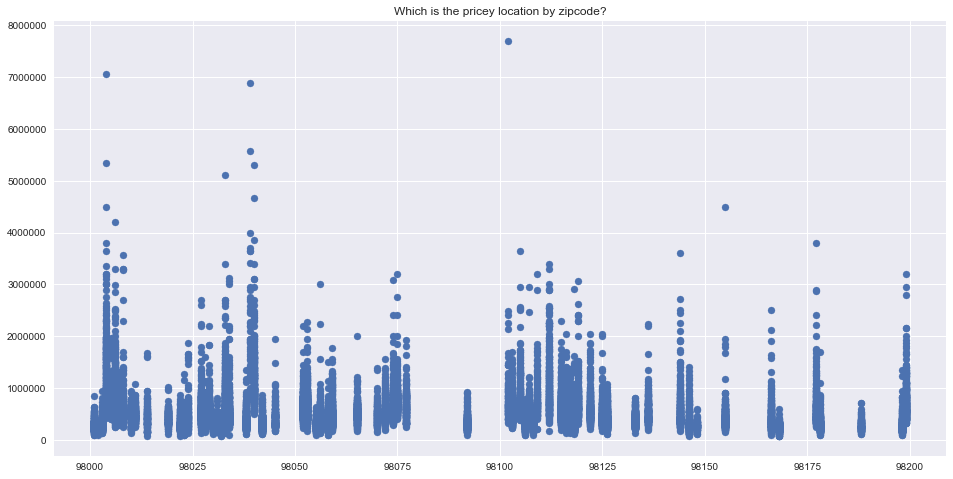

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey location by zipcode?")

# Treinamento...

In [56]:
#train1 = data.drop(['id', 'price'],axis=1)
#train1.head()

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
reg = LinearRegression()

Primeiro defino qual a coluna será meu rótulo para que eu possa fazer a previsão. 

Segundo quero alterar os valores de data para 2 valores possíveis, 0 ou 1. Isso por que quero diminuir a influência da data no resultado da previsão, então pego todos as casas construídas após 2014 e defino sua date como 0.

Depois crio um novo dataframe removendo as colunas de id e price.

In [21]:
labels = data['price']

In [22]:
# Converte os valores str para datetime
data['date'] = pd.to_datetime(data['date'])
# Converte o date time para um int apenas do ano
data['date'] = data['date'].apply(lambda date: date.year)
# Converte para 0 e 1 segundo o critério
data['date'] = data['date'].apply(lambda date: 1 if date == 2014 else 0)

In [23]:
train1 = data.drop(['id', 'price'],axis=1)

### Treino

Estou dividindo os dados em 90/10.

In [59]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [63]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.20,random_state =2)

In [64]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
reg.score(x_test,y_test)

0.7179942358738676

Depois de alguns testes e ajustes o melhor score que encontrei aqui foi de 73%. Isso não é bom, dado que meu objetivo inicial é chegar em 85%.

Sendo assim vou testar uma técnica diferente, que possui uma boa performance para modelos de previsão fracos como este.

## Gradient Boosting Regressor

A regressão de aumento do gradiente, é uma técnica de aprendizado de máquina para problemas de regressão e classificação ...

Criamos uma variável onde definimos nosso regressor de aumento de gradiente e definimos parâmetros para ele, aqui:
* n_estimator - O número de estágios de reforço a serem executados. Não devemos defini-lo muito alto, o que superaria nosso modelo.
* max_depth - A profundidade do nó da árvore.
* learning_rate - Taxa de aprendizado dos dados.
* função de perda - perda a ser otimizada. 'ls' refere-se a regressão de mínimos quadrados
* amostragem mínima - Número de amostra a ser dividida para o aprendizado dos dados

Em seguida, ajustamos nossos dados de treinamento no modelo de aumento de gradiente e verificamos se há precisão

In [66]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [67]:
ddd = clf.fit(x_train, y_train)

In [68]:
clf.score(x_test,y_test)

0.8976884510193051

In [69]:
params = ddd.get_params()

In [104]:
params

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [71]:
t_sc = np.zeros((params['n_estimators']),dtype=np.float64)

In [72]:
y_pred = reg.predict(x_test)

In [73]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i]=clf.loss_(y_test,y_pred)

In [74]:
testsc = np.arange((params['n_estimators']))+1

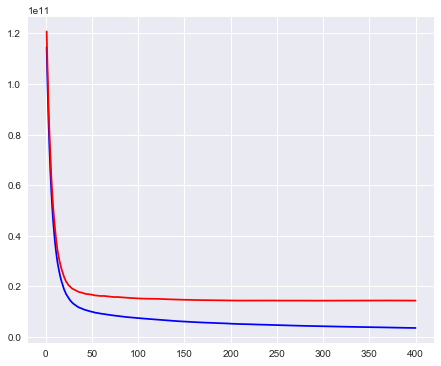

In [75]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')

In [76]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [77]:
pca = PCA()

In [78]:
pca.fit_transform(scale(train1))

array([[-2.63912921e+00, -2.21508289e-02, -3.19945945e-01, ...,
        -5.09379503e-01, -8.02082527e-02, -8.87043624e-15],
       [-2.25243801e-01,  1.70747997e+00, -7.64319282e-01, ...,
         1.85789179e-01,  9.81019712e-01,  1.74044620e-13],
       [-2.58818707e+00, -6.60887167e-01,  3.55764123e-01, ...,
         1.42737049e+00, -1.37321751e-01,  1.66512175e-14],
       ...,
       [-2.41120579e+00, -1.07548669e+00, -1.46683720e+00, ...,
        -6.95606695e-01,  9.66169827e-01, -9.12152323e-17],
       [ 3.13655998e-01, -1.92761669e+00, -1.03805358e+00, ...,
        -4.31441606e-01, -3.96116122e-01,  2.28809569e-16],
       [-2.42314973e+00, -1.06026237e+00, -1.47637686e+00, ...,
        -6.95275385e-01,  9.53057601e-01, -1.61721232e-17]])

In [79]:
predictions = clf.predict(x_test)

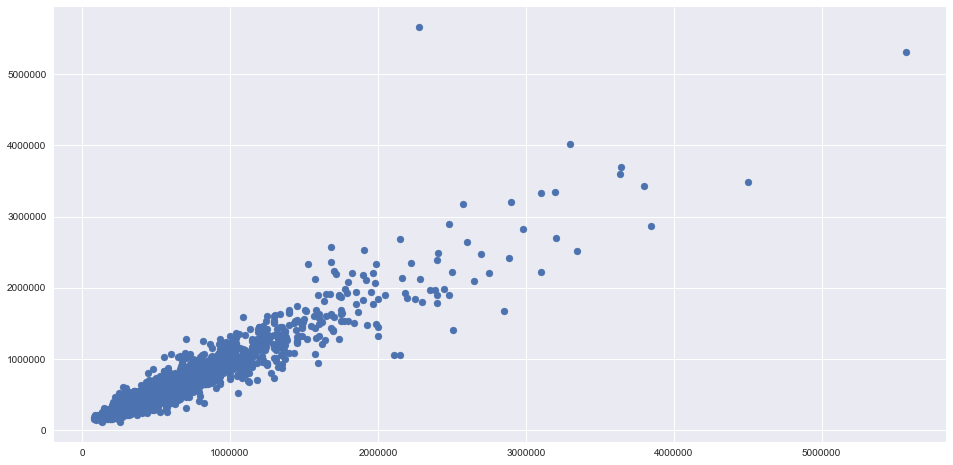

In [80]:
plt.figure(figsize=(16 ,8))
plt.scatter(y_test,predictions)

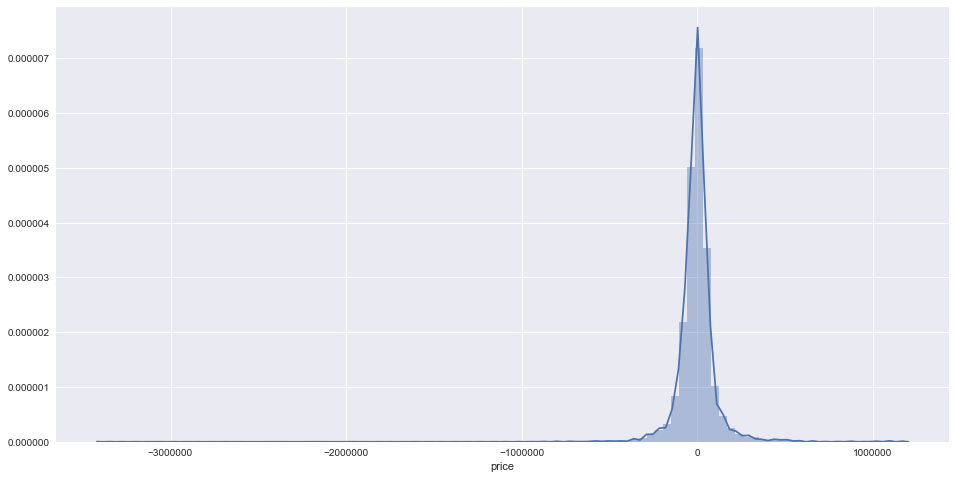

In [88]:
plt.figure(figsize=(16, 8))
sns.distplot((y_test-predictions),bins=100);

In [89]:
from sklearn import metrics

In [90]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 63303.36797631115
MSE: 14283531098.821238
RMSE: 119513.72765846289


In [103]:
#coeffecients = pd.DataFrame(clf.score.coef_,X.columns)
#coeffecients.columns = ['Coeffecient']
#coeffecients

In [94]:
# Let's print the R-squared value for train/test. 
# This explains how much of the variance in the data our model is able to decipher.
print("R-squared for Train: %.2f" %clf.score(x_train, y_train))  
print("R-squared for Test: %.2f" %clf.score(x_test, y_test)) 

R-squared for Train: 0.97
R-squared for Test: 0.90


Lending Club Loan Data - Top 10 Important Features

1. yr_renovated (0.135081)
2. zipcode (0.117746)
3. bedrooms (0.087276)
4. lat (0.086331)
5. bathrooms (0.085613)
6. sqft_above (0.078883)
7. condition (0.066799)
8. long (0.066635)
9. yr_built (0.060096)
10. view (0.052649)


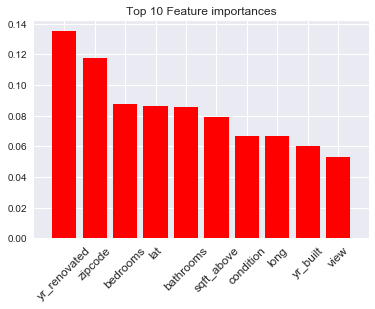

Mean Feature Importance 0.052632


In [101]:
# Calculate the feature ranking - Top 10 
importances = clf.feature_importances_ 
indices = np.argsort(importances)[::-1] 

print("Lending Club Loan Data - Top 10 Important Features\n")  

for f in range(10): 
    print("%d. %s (%f)" % (f + 1, data.columns[indices[f]], importances[indices[f]])) 
    
#Plot the feature importances of the forest 
indices=indices[:10] 

plt.figure() 
plt.title("Top 10 Feature importances") 
plt.bar(range(10), importances[indices], color="r", align="center") 
plt.xticks(range(10), data.columns[indices], fontsize=12, rotation=45) 
plt.xlim([-1, 10]) 
#plt.figure(figsize=(16 ,8))
plt.show() 

#Mean Feature Importance 
print("Mean Feature Importance %.6f" %np.mean(importances)) 

# Interesting, the total amount of interest received to date is the 
# top most influencer for getting a better interest rate. Good for the lenders eh? 
# Pay more interest, we'll give you a cut on the interest rate. Of course! 

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

'''
    Luckily scikit-learn has builit-in packages that can help with this. We'll use a crossvalidation 
    generator that can train the model by tuning the parameters based on a cross-validation subset (cv) 
    that is picked from within the training set. A different cv subset will be picked for each iteration, 
    we control the number of iterations. Then we will use these cv/train splits and run a gridsearch 
    function that will evaluate the model with each split and tune parameters to give us the best 
    parameter that gives the optimal result.
''' 

#Defining this as a function so we can call it anytime we want 
def GradientBooster(param_grid, n_jobs): 
    estimator = GradientBoostingRegressor() 
    #Choose cross-validation generator - let's choose ShuffleSplit which randomly shuffles and selects Train and CV sets 
    #for each iteration. There are other methods like the KFold split. 
    cv = ShuffleSplit(x_train.shape[0], n_iter=10, test_size=0.2) 
    #Apply the cross-validation iterator on the Training set using GridSearchCV. This will run the classifier on the 
    #different train/cv splits using parameters specified and return the model that has the best results 
    #Note that we are tuning based on the F1 score 2PR/P+R where P is Precision and R is Recall. This may not always be 
    #the best score to tune our model on. I will explore this area further in a seperate exercise. For now, we'll use F1. 
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs) 
    #Also note that we're feeding multiple neighbors to the GridSearch to try out. 
    #We'll now fit the training dataset to this classifier 
    classifier.fit(x_train, y_train) 
    #Let's look at the best estimator that was found by GridSearchCV 
    print("Best Estimator learned through GridSearch") 
    print(classifier.best_estimator_)  
    
    return cv, classifier.best_estimator_     

In [112]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV

#Great, in no time we have grabbed an unknown dataset from the web, munged it using Pandas and now have ready-to-go 
#training and test numpy arrays for running the GBRT regressor. Let's go! 
#WARNING - THIS MIGHT TAKE A WHILE TO RUN. TRY ADJUSTING parameters such as n_jobs (jobs to run in parallel, before 
#increasing this make sure your system can handle it), n_iter for ShuffleSplit (in the function definition) and reducing 
#number of values being tried for max_depth/n_estimators. 

#SELECT INTERRUPT IN THE MENU AND PRESS INTERRUPT KERNEL IF YOU NEEDD TO STOP EXECUTION 

param_grid={'n_estimators':[100],#,500,1000], 
            'learning_rate': [0.1,0.05,0.02],# 0.01], 
            'max_depth':[4,6], 
            'min_samples_leaf':[3,5,9,17], 
            'max_features':[1.0,0.3,0.1] 
           } 
n_jobs=4 

#Let's fit GBRT to the digits training dataset by calling the function we just created. 
cv,best_est=GradientBooster(param_grid, n_jobs) 

Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=1.0,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=3, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)


In [114]:
print("Final Estimator Parameters")  
print('-'*30) 
print("n_estimators: %d" %best_est.n_estimators)  
print("max_depth: %d" %best_est.max_depth)  
print("Learning Rate: %.1f" %best_est.learning_rate) 
print("min_samples_leaf: %d" %best_est.min_samples_leaf) 
print("max_features: %.1f" %best_est.max_features)  
print() 
print("Final Train R-squared: %.2f" %clf.score(x_train, y_train))  
print("Final Test R-squared: %.2f" %clf.score(x_test, y_test)) 

Final Estimator Parameters
------------------------------
n_estimators: 100
max_depth: 6
Learning Rate: 0.1
min_samples_leaf: 3
max_features: 1.0

Final Train R-squared: 0.97
Final Test R-squared: 0.90
